# Laptop Price Prediction

In this project I will prepare a prediction modelling for Laptop Prices based on their specifications. This dataset is taken from Kaggle. 

### Table of Contents:


1. Data Collection and Preparation
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Selection and Training
5. Model Evaluation and Tuning
6. Final Model and Deployment

<img src='https://i.rtings.com/assets/pages/ZRskDBBI/best-laptop-brands-20230420-3-medium.jpg?format=auto' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/code/keerthivasankannan/price-prediction-on-laptops-using-machine-learning/notebook' target= _blank> Can get data from this link

### Data Collection and Preparation

In [38]:
#Imports of required packages

import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df = pd.read_csv("laptop_data.csv")

### Exploratory Data Analysis

In [40]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [41]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [42]:
df.shape

(1303, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [44]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [70]:
df.corr(numeric_only=True)

,Inches,Price
Inches,1.000000,0.068197
Price,0.068197,1.000000


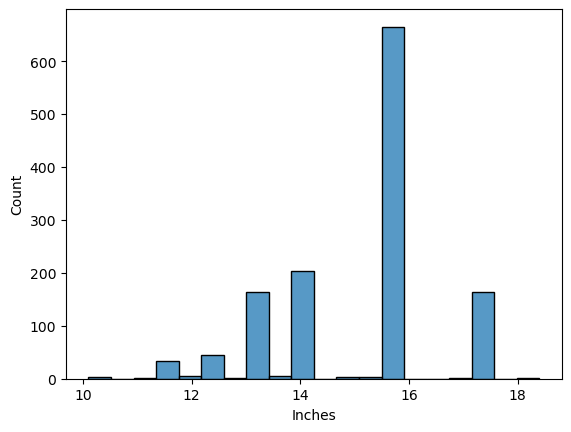

In [46]:
sns.histplot(x = df["Inches"], bins = 20);

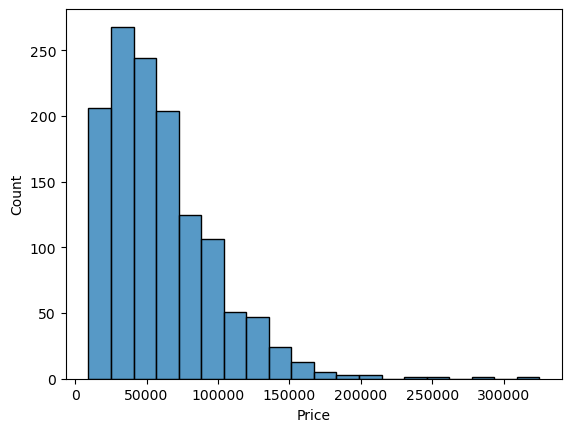

In [47]:
sns.histplot(x = df["Price"], bins = 20);

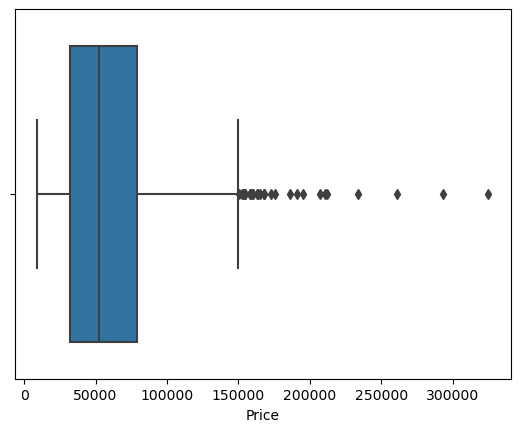

In [64]:
sns.boxplot(x = df["Price"]);

### Feature Engineering

In [48]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [49]:
#Drop useless columns
df = df.drop("Unnamed: 0", axis=1)

In [56]:
#Drop doubled rows
df.duplicated() # if exists any True check sums of them  
df.duplicated().sum() # drop duplicates
df.drop_duplicates()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [62]:
#Check for null values

df.isnull().sum() #if exists any null fill them with mean for integer cariables and median for categorical variables
#df.dropna()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [99]:
df.head()
df["Company"].unique() #make label encoding and create dummies
df["TypeName"].unique() #make label encoding and create dummies
df["Inches"].unique() #ready to correlation
df["ScreenResolution"].unique() #create new columns by this column's value
df["Cpu"].unique() #create new columns by this column's value for 'CPU_brand', 'CPU_model', 'CPU_speed'
df["Ram"].unique() #drop gb and make integer
df["Memory"].unique() #create new columns by this column's value for 'RAM_capacity', 'RAM_type'
df["Gpu"].unique() #create new columns by this column's value for 'GPU_brand', 'GPU_type'
df["OpSys"].unique() #make label encoding and create dummies
df["Weight"].unique() #drop kg and make integer

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [ ]:
df['Company_Encoded'] = le.fit_transform(df['Company'])
df['TypeName_Encoded'] = le.fit_transform(df['TypeName'])
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df['PanelType'] = df['ScreenResolution'].apply(lambda x: 'IPS' if 'IPS' in x else ('TN' if 'TN' in x else ('VA' if 'VA' in x else 'Unknown')))
df['Touchscreen'] = df['screenresolution'].apply(lambda x: '1' if 'touchscreen' in x.lower() else '0')
df['HD'] = df['screenresolution'].apply(lambda x: '1' if 'hd' in x.lower() else '0')
df['AspectRatio'] = df['Width'] / df['Height']
df['TotalPixels'] = df['Width'] * df['Height']
# CPU değerlerinden yeni sütunlar oluşturalım
df[['CPU Marka', 'CPU Model', 'CPU Hızı']] = df['Cpu'].str.split(' ', expand=True)
df['CPU Hızı'] = df['CPU Hızı'].str.extract('(\d+\.\d+)', expand=False)
df['CPU Hızı'] = df['CPU Hızı'].astype(float)

# Memory değerlerinden yeni sütunlar oluşturalım
df[['RAM Kapasitesi', 'Depolama Türü']] = df['Memory'].str.split(' ', 1, expand=True)
df['RAM Kapasitesi'] = df['RAM Kapasitesi'].astype(int)
df['Depolama Türü'] = df['Depolama Türü'].str.replace('GB', '').str.strip()
# GPU değerlerinden yeni sütunlar oluşturalım
df[['GPU Marka', 'GPU Model']] = df['Gpu'].str.split(' ', 1, expand=True)

# GPU türünü (entegre/ayrı) belirleyen yeni bir sütun oluşturalım
df['GPU Türü'] = 'Ayrı'
df.loc[df['GPU Marka'] == 'Intel', 'GPU Türü'] = 'Entegre'
# Label Encoding
le = LabelEncoder()
df['OpSys_Encoded'] = le.fit_transform(df['OpSys'])

# Farklı Kolonlara Ayırma
df = pd.get_dummies(df, columns=['OpSys'])
